## 项目背景与结论

__**聚类分析-用户画像分析**__

__背景__：本项目为电商公司用户画像分析，从用户属性、消费行为与其参与活动的历史数据出发，将用户分为不同群体，从而对不同的群体进行用户画像，找出其在消费上有哪些偏好，帮助企业更好的了解用户，最终可根据不同用户的画像对其进行精准营销，从而可以在业务上来着决策性的指导作用。

__结论:__

用户使用Kmeans,MiniBatchMneans,SpectralClustering,DBSCAN,层次聚类这几种模型尝试对用户聚类，最终选择效果最好的Agglomerative层次聚类模型将用户分为4类，以下是几种用户的画像和产品购买偏好。

    第0组用户，有一半为父母，最多会有2个孩子，孩子大多数为青少年，儿童占比不大。另一半则不是父母，所以他们年龄跨越比较大。大部分的教育水平处于中等以及以下。属于高消费与高收入人群，消费水平是所有组里最高的，比较经常参加促销活动，也会经常购买折扣的商品。

    第1组用户，基本上全为父母，家里很少有儿童，大部分家里有1个青少年，教育水平为中等及以下，年龄集中在40岁至70岁。消费水平较高，也属于高收入人群，但很少购买折扣商品。

    第2组用户，大部分为父母，但也有少部分不是父母，家里孩子是所有组中最多的，儿童甚至有3个，有一半的可能家庭会有青少年。消费水平较低，属于平均收入人群。会经常购买折扣商品。

    第3组用户，有一半为父母，但是家庭里很少有儿童，孩子以青少年为主。属于低消费，低收入人群。基本不参加促销活动，也很少购买折扣商品
    
    各个群体的用户都最喜欢买肉类产品，其次他们最喜欢买黄金和鱼类产品。其中对于第0组和第1组用户来说，肉类产品消费金额已经超出了他们累计购买金额的一半。
    

__分析步骤:__
~~~~~~~~~~~~~~~~~~~~
1. 数据清洗

    1.1 空值处理
    1.2 日期变换
    1.3 分类数据统计
2. 特征工程
    2.1 增加feature
    2.2 删除离群点
    2.3 查看相关性
    2.4 对分类变量的处理
    2.5 归一化处理
    2.6 PCA降维
3. 聚类
    3.1 选择k值
    3.2 层次聚类
    3.3 MiniBatchKmeans
    3.4 Kmeans
    3.5 SpectrualClustering
    3.6 DBSCAN
    
4. 业务分析
    4.1 聚类类别分布
    4.2 income与gmv分布
    4.3 不同类别人群的消费金额
    4.4 不同类别的促销活动参与情况
    4.5 不同类别人群的交易量
    
5. 用户画像
~~~~~~~~~~~~~~~~~~~~



__字段释义:__

字段名称  | 字段释义
------------- | -------------
ID  | 用户ID
Year_Birth  | 用户出生年份
Education  | 用户教育程度
Marital_Status  | 用户婚姻状况
Income  | 用户的年收入
Kidhome  | 用户家庭中是否有儿童
Teenhome  | 用户家庭中是否有青少年
Dt_Customer  | 用户注册的时间
Recency  | 用户自上次购买至今的天数
MntWines  | 购买酒类商品的金额
MntFruits  | 购买水果商品的金额
MntMeatProducts  | 购买肉类商品的金额
MntFishProducts  | 购买鱼类商品的金额
MntSweetProducts  | 购买糖果类商品的金额
MntGoldProds  | 购买黄金类商品的金额
NumDealsPurchases  | 购买折扣商品的次数
NumWebPurchases  | 从web端购买商品的次数
NumCatalogPurchases  | 从分类页购买商品的次数
NumStorePurchases  | 直接从商店购买商品的次数
NumWebVisitsMonth  | 上个月访问公司网站的次数
AcceptedCmp3  | 用户参与了第3次促销活动
AcceptedCmp4  | 用户参与了第4次促销活动
AcceptedCmp5  | 用户参与了第5次促销活动
AcceptedCmp1  | 用户参与了第1次促销活动
AcceptedCmp2  | 用户参与了第2次促销活动
Response  | 用户参与过促销活动为1，否则为0
Complain  | 用户若在过去2年内有投诉则为1，否则为0
Z_CostContact  | 联系人
Z_Revenue  | 收益



In [120]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN



from sklearn.datasets import make_blobs

from palettable.colorbrewer.qualitative import Pastel1_7
import plotly.graph_objects as go
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['KaiTi']
plt.rcParams['axes.unicode_minus'] = False

In [80]:
#\t 制表符，一个tab键 （4个空格）的距离
df = pd.read_csv('C:\\Users\\songbeibei\\Downloads\\marketing_campaign.csv', sep="\t")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## 数据清洗 

In [82]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 空值处理 

In [84]:
df = df.dropna()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

### 日期变换

In [86]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

In [87]:
df["date"] = pd.to_datetime(df["Dt_Customer"]).dt.date

In [88]:
print("最新客户注册日期为：", max(df["date"]))
print("最老客户注册日期为：", min(df["date"]))

最新客户注册日期为： 2014-12-06
最老客户注册日期为： 2012-01-08


In [89]:
df["delta"] = max(df["date"]) - df["date"]

In [90]:
df["delta"]

0      971 days
1      125 days
2      472 days
3       65 days
4      321 days
         ...   
2235   541 days
2236    61 days
2237   315 days
2238   316 days
2239   782 days
Name: delta, Length: 2216, dtype: timedelta64[ns]

### 分类数据统计

In [91]:
df["Marital_Status"].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [92]:
df["Education"].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

## 特征工程 

### 增加feature

In [93]:
#增加年龄
df["age"] = 2021-df["Year_Birth"]

In [94]:
#用户累计GMV
df["sum_gmv"] = df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [95]:
#
df["living_partner"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone","Divorced":"Alone", "Single":"Alone"})

In [96]:
#家庭子女情况,有儿童和青少年都算为有子女
df["children"] = df["Kidhome"] +df["Teenhome"]

In [97]:
#家庭成员数量
df["family_nbr"] = df["children"] +df["living_partner"].replace({"Alone": 1, "Partner":2})

In [98]:
#是否为父母
df["is_parents"] = np.where(df.children >=1,1,0)

In [99]:
#学历分组
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate","Graduation":"Graduate","PhD":"Postgraduate","Master":"Postgraduate"})

In [100]:
#删除多余的列
df = df.drop(["ID","Dt_Customer","Year_Birth","Z_Revenue","Z_CostContact","Marital_Status"],axis = 1)

In [101]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273        54.752082         41.072046   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.250000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  AcceptedCmp1  AcceptedCmp2     Complain  \
count   2216.000000  ...   2216.000000   2216.000000  2216.000000   
mean      43.965253  ...      0.064079      0.013538     0.009477   
std       51.815414  ...      0.244950      0.115588     0.096907   
min        0.000000  ...      0.000000      0.000000     0.000000   
25%        9.000000  ...      0.000000      0.000000     0.000000   
50%       24.500000  ...      0.000000      0.000000     0.000000   
75%       56.000000  ...      0.000000      0.000000     0.000000   
max      321.000000  ...      1.000000      1.000000     1.000000   

          Response                        delta          age      sum_gmv  \
count  2216.000000                         2216  2216.000000  2216.000000   
mean      0.150271  512 days 00:09:05.848375448    52.179603   607.075361   
std       0.357417  232 days 11:15:24.558024988    11.985554   602.900476   
min       0.000000              0 days 00:00:00    25.000000     5.000000   
25%       0.000000            340 days 00:00:00    44.000000    69.000000   
50%       0.000000            513 days 00:00:00    51.000000   396.500000   
75%       0.000000            686 days 00:00:00    62.000000  1048.000000   
max       1.000000           1063 days 00:00:00   128.000000  2525.000000   

          children   family_nbr   is_parents  
count  2216.000000  2216.000000  2216.000000  
mean      0.947202     2.592509     0.714350  
std       0.749062     0.905722     0.451825  
min       0.000000     1.000000     0.000000  
25%       0.000000     2.000000     0.000000  
50%       1.000000     3.000000     1.000000  
75%       1.000000     3.000000     1.000000  
max       3.000000     5.000000     1.000000  

[8 rows x 28 columns]

### 删除离群点

In [102]:
#sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
#F0FFF0
#pal = ["#BC8F8F","#C1CDC1", "#7A8B8B","#CD8162"]
#pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
sns.set(rc={"axes.facecolor":"#CDC8B1","figure.facecolor":"#CDC8B1"})
palett = sns.color_palette(["#BC8F8F","#CD8162","#EEE9BF","#9BCD9B","#96CDCD","#5F9EA0"])
cmap = colors.ListedColormap(["#BC8F8F","#CD8162","#EEE9BF","#9BCD9B","#96CDCD","#5F9EA0"])
#cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

In [103]:
#sns.choose_colorbrewer_palette("diverging")

<Figure size 576x396 with 0 Axes>

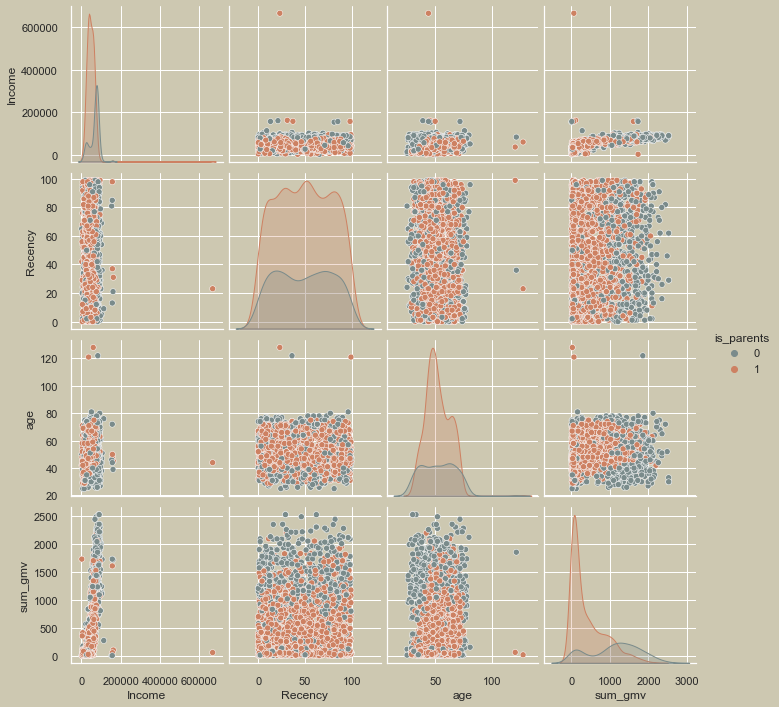

In [104]:
#Plotting following features
To_Plot = [ "Income", "Recency", "date", "age", "sum_gmv", "is_parents"]
plt.figure()
sns.pairplot(df[To_Plot], hue= "is_parents",palette= (["#7A8B8B","#CD8162"]))
#Taking hue 
plt.show()

In [105]:
#income 和age 有一些离群点，需要删除
df = df[df["Income"]<600000]
df = df[df["age"]<90]

In [106]:
print("最终df的数据量： ",len(df))

最终df的数据量：  2212


### 查看相关性

<AxesSubplot:>

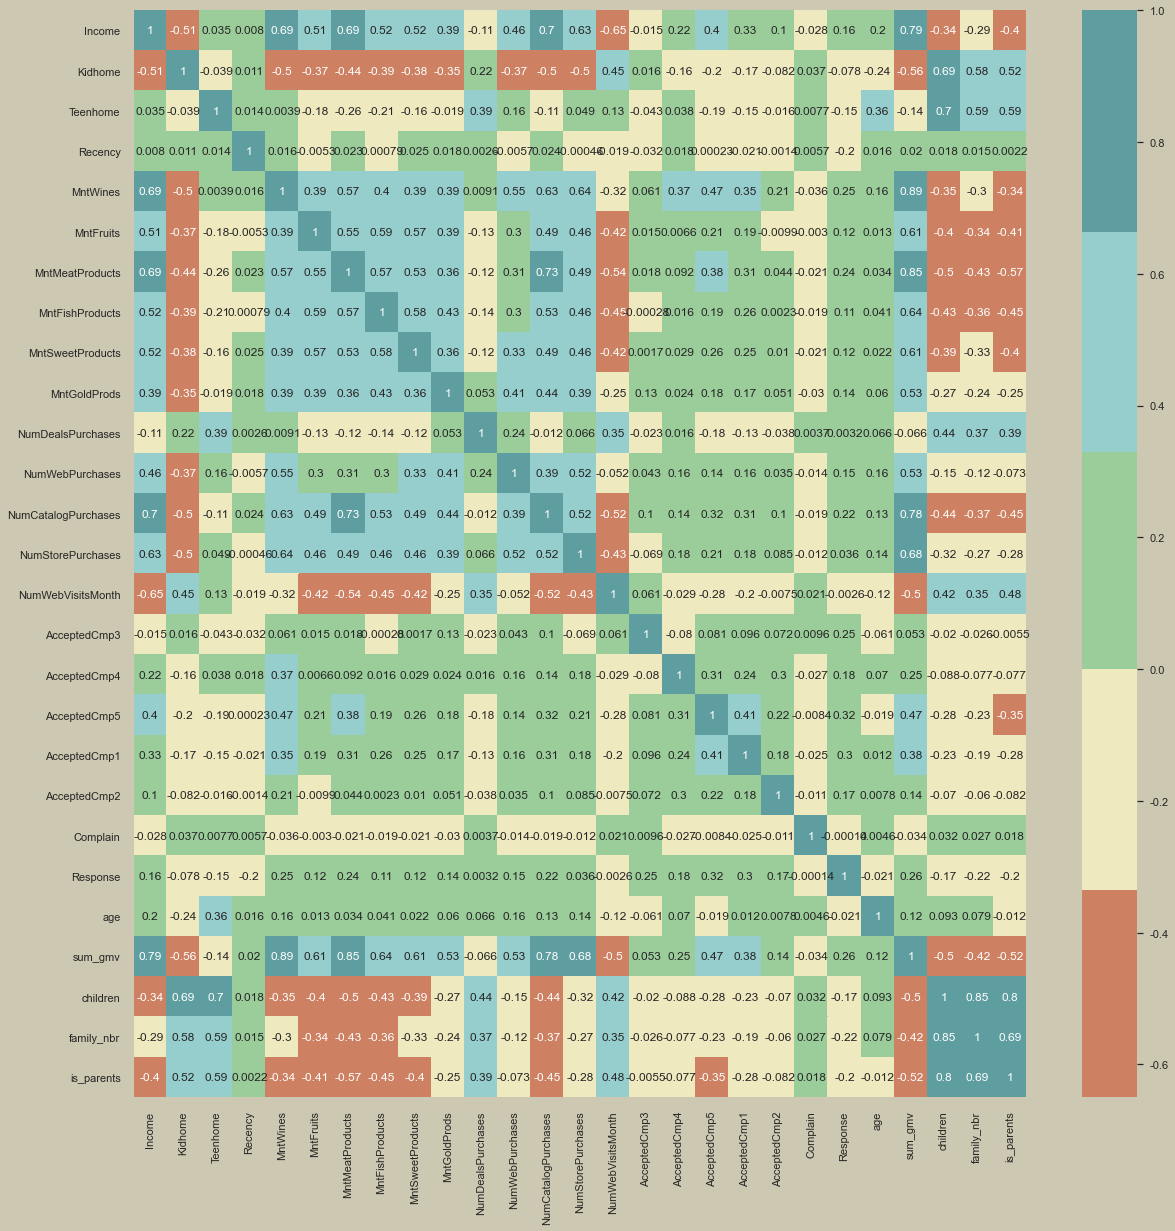

In [107]:
#查看相关性矩阵
plt.figure(figsize=(20,20))  
corr_matrix= df.corr()
sns.heatmap(corr_matrix,annot=True, cmap=cmap, center=0)

In [108]:
##数据没有特别高度相关的###

### 对分类变量的处理

In [109]:
#查找分类变量的index
cols = list(df.dtypes[df.dtypes == "object"].index)

In [110]:
cols

['Education', 'date', 'living_partner']

In [111]:
LE = LabelEncoder()

In [112]:
df["Education"] = df[["Education"]].apply(LE.fit_transform)
df["living_partner"] = df[["living_partner"]].apply(LE.fit_transform)

In [113]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          0  58138.0        0         0       58       635         88   
1          0  46344.0        1         1       38        11          1   
2          0  71613.0        0         0       26       426         49   
3          0  26646.0        1         0       26        11          4   
4          1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Complain  \
0              546              172                88  ...         0   
1                6                2                 1  ...         0   
2              127              111                21  ...         0   
3               20               10                 3  ...         0   
4              118               46                27  ...         0   

   Response        date    delta  age  sum_gmv  living_partner  children  \
0         1  2012-04-09 971 days   64     1617               0         0   
1         0  2014-08-03 125 days   67       27               0         2   
2         0  2013-08-21 472 days   56      776               1         0   
3         0  2014-10-02  65 days   37       53               1         1   
4         0  2014-01-19 321 days   40      422               1         1   

   family_nbr  is_parents  
0           1           0  
1           3           1  
2           2           0  
3           3           1  
4           3           1  

[5 rows x 31 columns]

In [114]:
ds = df.copy()

In [115]:
ds = ds.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','date',"delta"] ,axis = 1)

### feature归一化处理 

In [116]:
scaler = StandardScaler()
scaler.fit(ds)

StandardScaler()

In [117]:
scaled_ds = pd.DataFrame(scaler.transform(ds),columns = ds.columns)

In [118]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660   1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618  -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935   0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618  -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257   0.419540   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  NumWebPurchases  \
0         1.690293         2.453472          1.483713  ...         1.426865   
1        -0.718230        -0.651004         -0.634019  ...        -1.126420   
2        -0.178542         1.339513         -0.147184  ...         1.426865   
3        -0.655787        -0.504911         -0.585335  ...        -0.761665   
4        -0.218684         0.152508         -0.001133  ...         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       age  \
0             2.503607          -0.555814           0.692181  1.018352   
1            -0.571340          -1.171160          -0.132545  1.274785   
2            -0.229679           1.290224          -0.544908  0.334530   
3            -0.913000          -0.555814           0.279818 -1.289547   
4             0.111982           0.059532          -0.132545 -1.033114   

    sum_gmv  living_partner  children  family_nbr  is_parents  
0  1.676245       -1.349603 -1.264598   -1.758359   -1.581139  
1 -0.963297       -1.349603  1.404572    0.449070    0.632456  
2  0.280110        0.740959 -1.264598   -0.654644   -1.581139  
3 -0.920135        0.740959  0.069987    0.449070    0.632456  
4 -0.307562        0.740959  0.069987    0.449070    0.632456  

[5 rows x 22 columns]

### PCA降维

In [41]:
pca = PCA(n_components =3)
pca.fit(scaled_ds)
pca_ds = pd.DataFrame(pca.transform(scaled_ds),columns = (["col1","col2","col3"]))
pca_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -1.606109e-16  2.877338 -5.940876 -2.552996 -0.776146  2.394880   
col2  2212.0  8.662952e-17  1.699736 -4.285528 -1.329375 -0.149694  1.244895   
col3  2212.0  2.675176e-17  1.153616 -2.943620 -0.890900 -0.140871  0.813051   

           max  
col1  7.411440  
col2  6.110742  
col3  3.965047

In [42]:
pca_ds["col1"]

0       4.936903
1      -2.835609
2       2.624988
3      -2.620430
4      -0.627504
          ...   
2207    2.314692
2208   -3.056161
2209    2.699507
2210    1.518638
2211   -2.777623
Name: col1, Length: 2212, dtype: float64

In [43]:
x = pca_ds["col1"]
y = pca_ds["col2"]
z = pca_ds["col3"]

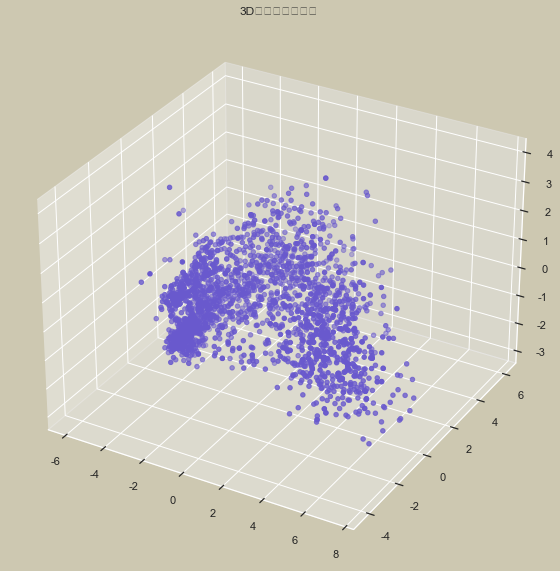

In [119]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111,projection="3d")
ax.scatter(x,y,z,c = "#6959CD",marker = "o")
ax.set_title("3D特征降维映射图")
plt.show()

In [45]:
##查看动态三维分布
x = pca_ds["col1"]
y = pca_ds["col2"]
z = pca_ds["col3"]
fig = go.Figure(data=[go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=6,color=x,opacity=0.8))])
fig.update_layout(title ={'text':"3D降维映射散点图",'y':0.9,"x":0.5,"xanchor":"center","yanchor":"top"},margin = dict(l=200,r=220,b=0,t=0))
fig.show()

## 聚类 

### 选择k值

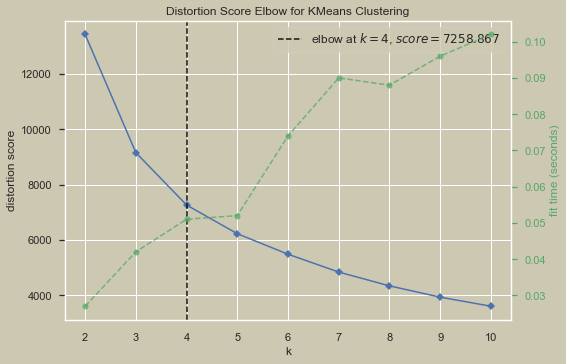

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
elbow = KElbowVisualizer(KMeans(),k=10)
elbow.fit(pca_ds)
elbow.show()
###根据下图，k最优为4

### MiniBatchKmeans

In [47]:

mk = MiniBatchKMeans(n_clusters =4)
mk_ds = mk.fit_predict(pca_ds)
pca_ds["clusters"] = mk_ds

In [48]:
fig = go.Figure(data=[go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=6,color=pca_ds["clusters"],colorscale='Viridis',opacity=0.8))])
fig.update_layout(title ={'text':"MiniBatchKmeans映射散点图",'y':0.9,"x":0.5,"xanchor":"center","yanchor":"top"},margin = dict(l=200,r=220,b=0,t=0))
fig.show()

In [49]:
mk_score = metrics.silhouette_score(pca_ds,mk_ds,metric='euclidean')# 轮廓系数得分
print("MiniBatchKmeans的轮廓系数得分",mk_score)

MiniBatchKmeans的轮廓系数得分 0.45185060242235936


### Kmeans

In [50]:
km = KMeans(n_clusters=4,init= "k-means++",random_state=50)
km_ds = km.fit_predict(pca_ds)
pca_ds["clusters"] = km_ds

In [51]:
fig = go.Figure(data=[go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=6,color=pca_ds["clusters"],colorscale='Viridis',opacity=0.8))])
fig.update_layout(title ={'text':"KMeans映射散点图",'y':0.9,"x":0.5,"xanchor":"center","yanchor":"top"},margin = dict(l=200,r=220,b=0,t=0))
fig.show()

In [52]:
km_score = metrics.silhouette_score(pca_ds,km_ds,metric='euclidean')# 轮廓系数得分
print("Kmeans的轮廓系数得分",km_score)

Kmeans的轮廓系数得分 0.40895135257681475


### SpectralClustering 

In [140]:
sc = SpectralClustering(n_clusters=4)
sc_ds = sc.fit_predict(pca_ds)
pca_ds["clusters"] = sc_ds

In [142]:
fig = go.Figure(data=[go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=6,color=pca_ds["clusters"],colorscale='Viridis',opacity=0.8))])
fig.update_layout(title ={'text':"SpectralClustering 映射散点图",'y':0.9,"x":0.5,"xanchor":"center","yanchor":"top"},margin = dict(l=200,r=220,b=0,t=0))
fig.show()

In [143]:
from sklearn import metrics
sc_score = metrics.silhouette_score(pca_ds,sc_ds,metric='euclidean')# 轮廓系数得分
print("SpectralClustering的轮廓系数得分",sc_score)

SpectralClustering的轮廓系数得分 0.37779642448445616


### DBSCAN

In [197]:
dbs = DBSCAN(eps=0.30, min_samples=9)
dbs_ds = dbs.fit_predict(pca_ds)
pca_ds["clusters"] = dbs_ds

In [198]:
fig = go.Figure(data=[go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=6,color=pca_ds["clusters"],colorscale='Viridis',opacity=0.8))])
fig.update_layout(title ={'text':"DBSCAN映射散点图",'y':0.9,"x":0.5,"xanchor":"center","yanchor":"top"},margin = dict(l=200,r=220,b=0,t=0))
fig.show()

In [199]:
dbs_score = metrics.silhouette_score(pca_ds,dbs_ds,metric='euclidean')# 轮廓系数得分
print("DBSCAN的轮廓系数得分",dbs_score)

DBSCAN的轮廓系数得分 0.31355683854607974


### 层次聚类--AGNES

In [200]:
ac = AgglomerativeClustering(n_clusters=4)
ac_ds = ac.fit_predict(pca_ds)
pca_ds["clusters"] = ac_ds

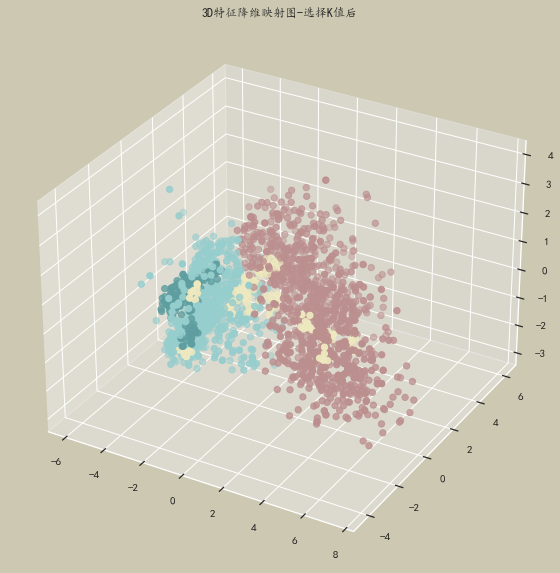

In [201]:
#查看三维分布
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(111,projection="3d",label = "bla")
ax.scatter(x,y,z,c = pca_ds["clusters"],marker = "o",cmap = cmap, s =40)
ax.set_title("3D特征降维映射图-选择K值后")
plt.show()

In [202]:
fig = go.Figure(data=[go.Scatter3d(x=x,y=y,z=z,mode='markers',marker=dict(size=6,color=pca_ds["clusters"],colorscale='Viridis',opacity=0.8))])
fig.update_layout(title ={'text':"层次聚类映射散点图",'y':0.9,"x":0.5,"xanchor":"center","yanchor":"top"},margin = dict(l=200,r=220,b=0,t=0))
fig.show()

In [203]:
ac_score = metrics.silhouette_score(pca_ds,ac_ds,metric='euclidean')# 轮廓系数得分
print("层次聚类的轮廓系数得分",ac_score)

层次聚类的轮廓系数得分 0.14798351913694904


In [204]:
print("<<<----------------各聚类模型轮廓系数如下--------------->>>")
print("层次聚类的轮廓系数得分",ac_score)
print("MiniBatchKmeans的轮廓系数得分",mk_score)
print("Kmeans的轮廓系数 ",km_score)
print("SpectralClustering的轮廓系数 ",sc_score)
print("DBSCAN的轮廓系数 ",dbs_score)

<<<----------------各聚类模型轮廓系数如下--------------->>>
层次聚类的轮廓系数得分 0.14798351913694904
MiniBatchKmeans的轮廓系数得分 0.45185060242235936
Kmeans的轮廓系数  0.40895135257681475
SpectralClustering的轮廓系数  0.37779642448445616
DBSCAN的轮廓系数  0.31355683854607974


综上，选择轮廓系数最小的__层次聚类__模型作为选择的最终模型

## 模型-业务分析

### 聚类类别分布

In [205]:
df["clusters"] = ac_ds

In [206]:
df.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          0  58138.0        0         0       58       635         88   
1          0  46344.0        1         1       38        11          1   
2          0  71613.0        0         0       26       426         49   
3          0  26646.0        1         0       26        11          4   
4          1  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...        date  \
0              546              172                88  ...  2012-04-09   
1                6                2                 1  ...  2014-08-03   
2              127              111                21  ...  2013-08-21   
3               20               10                 3  ...  2014-10-02   
4              118               46                27  ...  2014-01-19   

     delta  age  sum_gmv  living_partner  children  family_nbr  is_parents  \
0 971 days   64     1617               0         0           1           0   
1 125 days   67       27               0         2           3           1   
2 472 days   56      776               1         0           2           0   
3  65 days   37       53               1         1           3           1   
4 321 days   40      422               1         1           3           1   

   clusters  total_promos  
0         0             0  
1         2             0  
2         0             0  
3         2             0  
4         2             0  

[5 rows x 33 columns]

Text(0.5, 1.0, '聚类类别分布直方图')

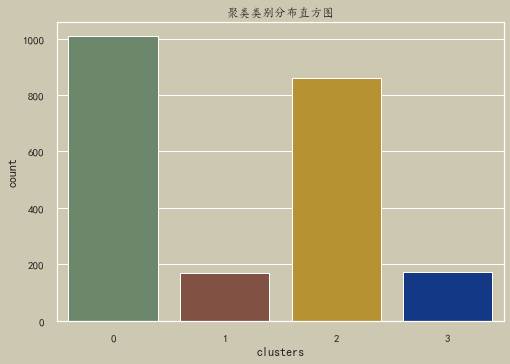

In [207]:
pal = ["#698B69","#8B4C39", "#CD9B1D","#003399"]
pl = sns.countplot(x = df["clusters"],palette=pal)
pl.set_title("聚类类别分布直方图")

### 聚类-income与gmv的分布

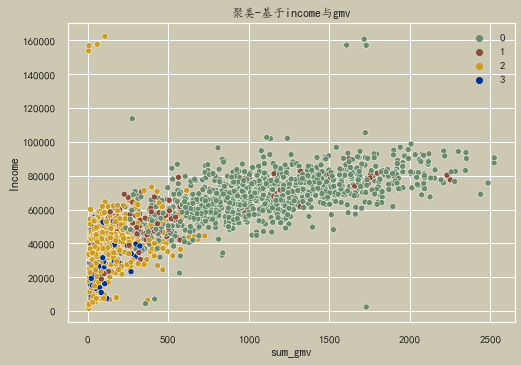

In [208]:
pl = sns.scatterplot(data = df,x = df["sum_gmv"], y = df["Income"],hue = df["clusters"],palette=pal)
pl.set_title("聚类-基于income与gmv")
plt.legend()
plt.show()

从上图income与gmv的关系来看，
     
    第0组：高消费，高收入人群。
    第1组：平均消费，高收入人群。
    第2组：低消费，平均收入人群。
    第3组：低消费，低收入人群。

### 不同类别人群的累计消费金额

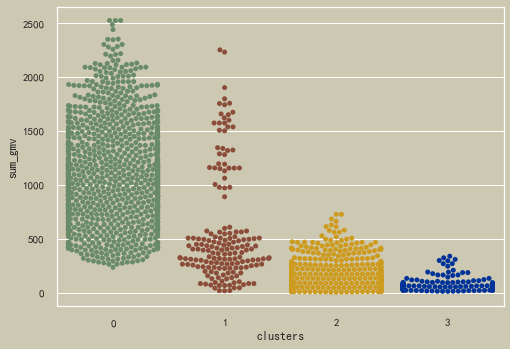

In [215]:
plt.figure()
pl= sns.swarmplot(x = df["clusters"],y = df["sum_gmv"],palette=pal )
plt.show()

消费金额最高的是第0组用户与，其次为第1组用户。第2组和第3组用户消费金额都很少。

### 不同类别的促销活动参与情况

In [211]:
#查看之前他们参加促销的人数

In [212]:
df["total_promos"] = df["AcceptedCmp1"]+df["AcceptedCmp2"]+df["AcceptedCmp3"]+df["AcceptedCmp4"]+df["AcceptedCmp5"]

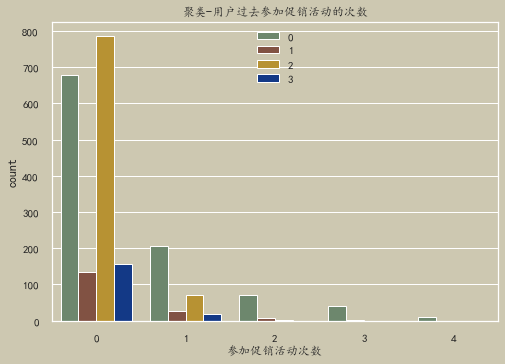

In [226]:
plt.figure()
pl= sns.countplot(x = df["total_promos"],hue = df["clusters"] ,palette=pal)
pl.set_xlabel("参加促销活动次数")
pl.set_title("聚类-用户过去参加促销活动的次数")
plt.legend()
plt.show()

从上图可以看出，大部分用户都没有参加过促销活动，少量用户参加过1次促销活动。而第0组用户参加过2次以上的促销活动。

### 不同类别人群的折扣商品交易次数

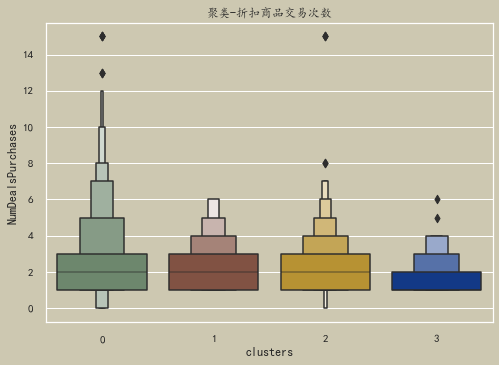

In [218]:
plt.figure()
pl= sns.boxenplot(x = df["clusters"],y=df["NumDealsPurchases"] ,palette=pal)
pl.set_title("聚类-折扣商品交易次数")
plt.show()

  对于第0组和第2组，他们会经常购买折扣商品。

  但是对于消费较高的第1组来说，他们确很少购买折扣商品。

  而第3组用户，他们购买商品的总金额比较少，同时也很少购买折扣商品。

## 用户画像

### 基本信息画像 

In [220]:
personel = [ "Kidhome","Teenhome", "age", "children", "family_nbr", "is_parents", "Education","living_partner"]

<Figure size 576x396 with 0 Axes>

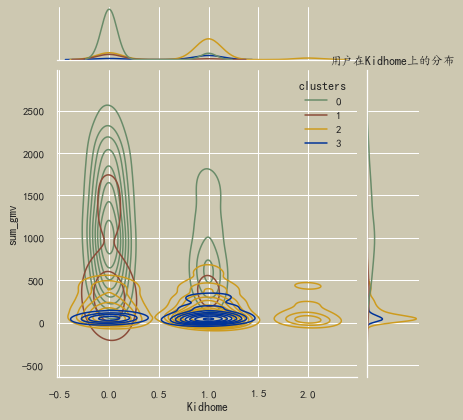

<Figure size 576x396 with 0 Axes>

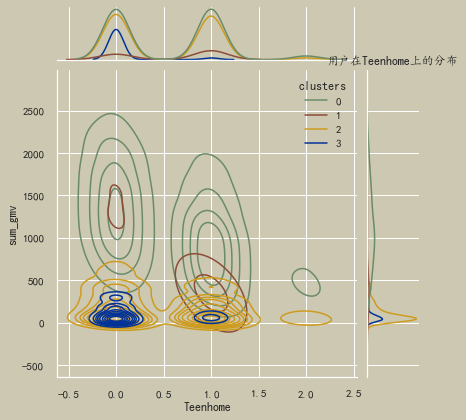

<Figure size 576x396 with 0 Axes>

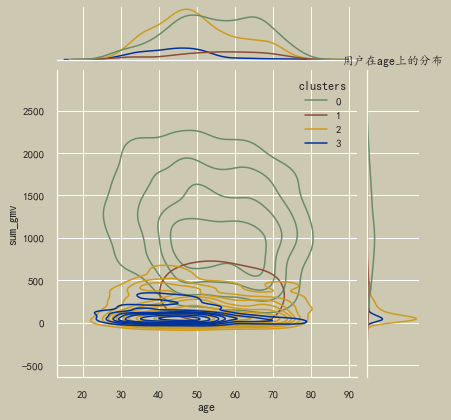

<Figure size 576x396 with 0 Axes>

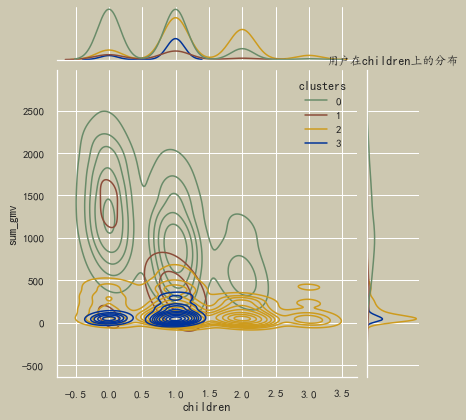

<Figure size 576x396 with 0 Axes>

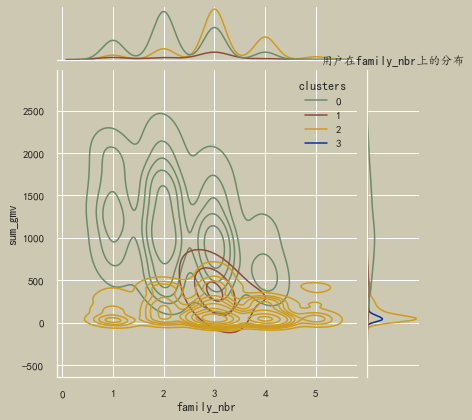

<Figure size 576x396 with 0 Axes>

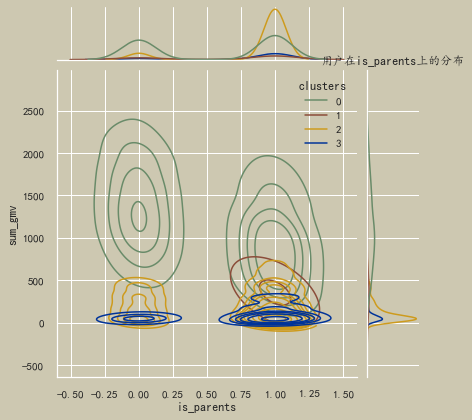

<Figure size 576x396 with 0 Axes>

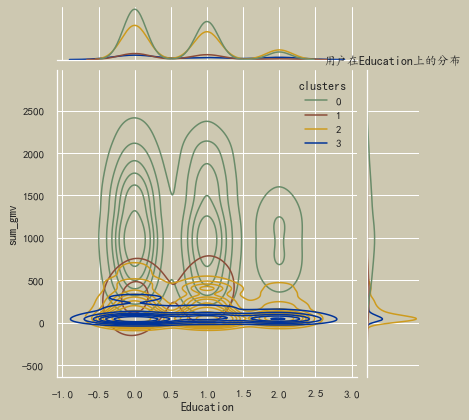

<Figure size 576x396 with 0 Axes>

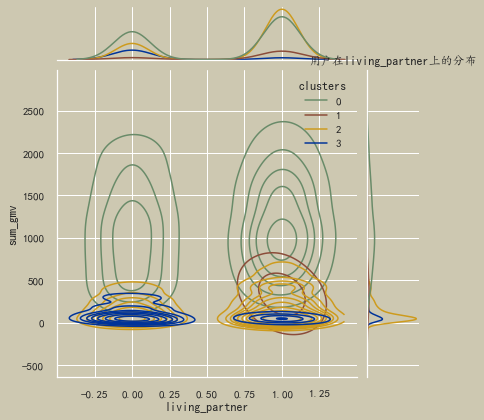

In [221]:
for i in personel:
    plt.figure()
    sns.jointplot(x = df[i],y = df["sum_gmv"],hue =df["clusters"],kind = "kde",palette=pal)
    plt.title("用户在"+str(i)+"上的分布")
    plt.show()

由上图可以得出，

第0组用户，有一半为父母，最多会有2个孩子，孩子大多数为青少年，儿童占比不大。另一半则不是父母，所以他们年龄跨越比较大。大部分的教育水平处于中等以及以下。

第1组用户，基本上全为父母，家里很少有儿童，大部分家里有1个青少年，教育水平为中等及以下，年龄集中在40岁至70岁。

第2组用户，大部分为父母，但也有少部分不是父母，家里孩子是所有组中最多的，儿童甚至有3个，有一半的可能家庭会有青少年。

第3组用户，有一半为父母，但是家庭里很少有儿童，孩子以青少年为主。

### 不同人群产品偏好

In [222]:
sum_gmv_group0 = sum(df[df["clusters"] == 0]["MntFruits"]+df[df["clusters"] == 0]["MntMeatProducts"]+df[df["clusters"] == 0]["MntFishProducts"]+df[df["clusters"] == 0]["MntSweetProducts"]+df[df["clusters"] == 0]["MntGoldProds"])
sum_gmv_group1 = sum(df[df["clusters"] == 1]["MntFruits"]+df[df["clusters"] == 1]["MntMeatProducts"]+df[df["clusters"] == 1]["MntFishProducts"]+df[df["clusters"] == 1]["MntSweetProducts"]+df[df["clusters"] == 1]["MntGoldProds"])
sum_gmv_group2 = sum(df[df["clusters"] == 2]["MntFruits"]+df[df["clusters"] == 2]["MntMeatProducts"]+df[df["clusters"] == 2]["MntFishProducts"]+df[df["clusters"] == 2]["MntSweetProducts"]+df[df["clusters"] == 2]["MntGoldProds"])
sum_gmv_group3 = sum(df[df["clusters"] == 3]["MntFruits"]+df[df["clusters"] == 3]["MntMeatProducts"]+df[df["clusters"] == 3]["MntFishProducts"]+df[df["clusters"] == 3]["MntSweetProducts"]+df[df["clusters"] == 3]["MntGoldProds"])

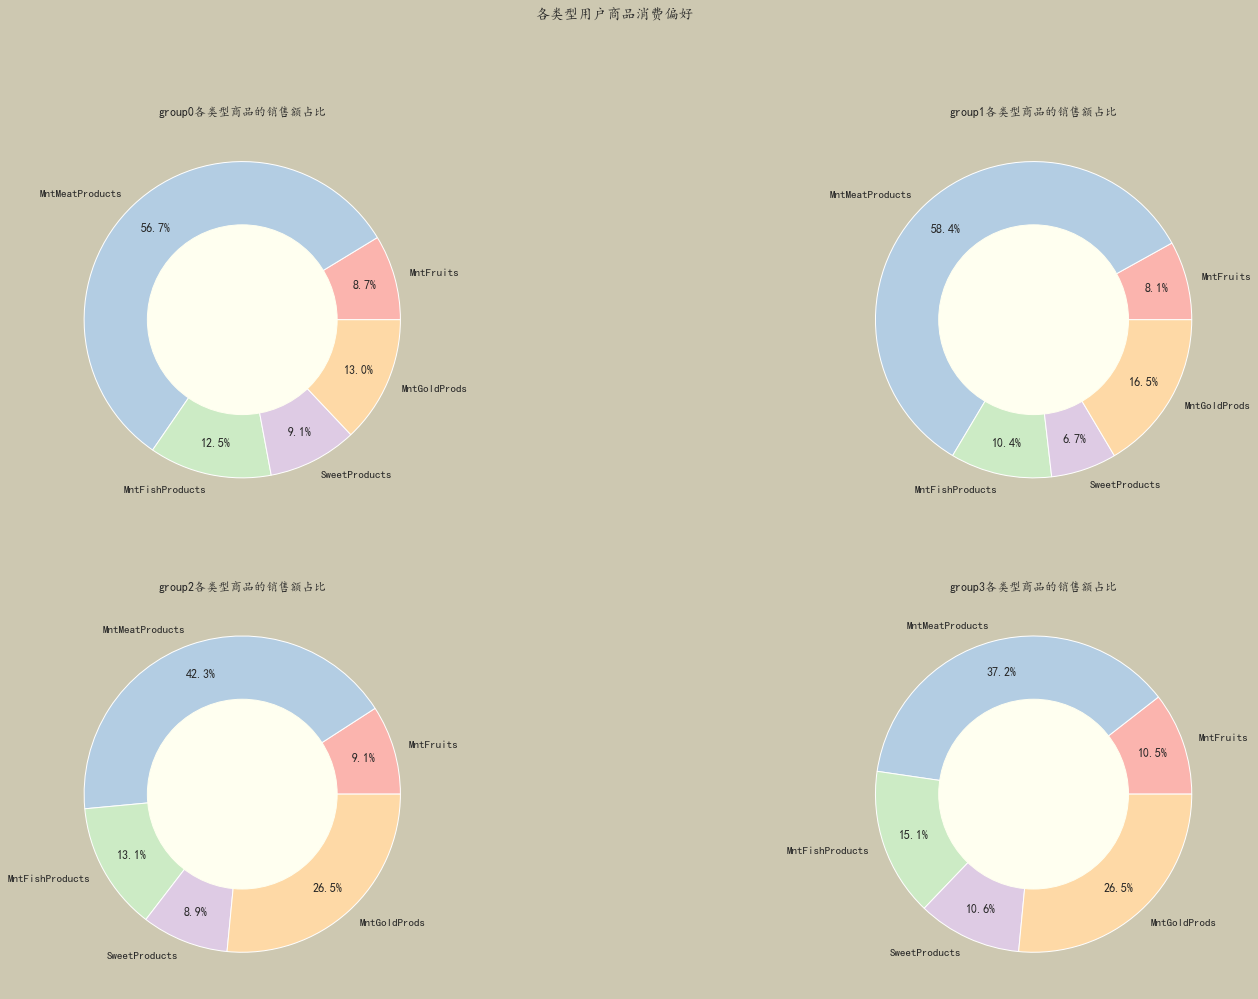

In [223]:
fig, ax = plt.subplots(2,2, figsize=(26,16))
grouplist = [0,1,2,3]
group_gmvlist = [sum_gmv_group0,sum_gmv_group1,sum_gmv_group2,sum_gmv_group3]
fig.suptitle('各类型用户商品消费偏好')
for i,j in zip(grouplist,group_gmvlist):
    plt.subplot(221+i)
    #my_dpi=11
    #plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

    names='MntFruits', 'MntMeatProducts', 'MntFishProducts', 'SweetProducts','MntGoldProds',
    size=[sum(df[df["clusters"] == i]["MntFruits"])/j,
          sum(df[df["clusters"] == i]["MntMeatProducts"])/j,
          sum(df[df["clusters"] == i]["MntFishProducts"])/j,
          sum(df[df["clusters"] == i]["MntSweetProducts"])/j,
          sum(df[df["clusters"] == i]["MntGoldProds"])/j]
    
    my_circle=plt.Circle( (0,0), 0.6, color='ivory')

    plt.pie(size, labels=names, colors=Pastel1_7.hex_colors,autopct='%.1f%%',pctdistance=0.8)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title("group"+str(i)+"各类型商品的销售额占比")
plt.show()

各个群体的用户最喜欢买肉类产品，其次他们最喜欢买黄金和鱼类产品。其中对于第0组和第1组用户来说，肉类产品消费金额已经超出了他们累计购买金额的一半。

__END__